<a href="https://colab.research.google.com/github/muizzuddin99/CNNAudio_FProject/blob/main/HomeSafetyDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     36992     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

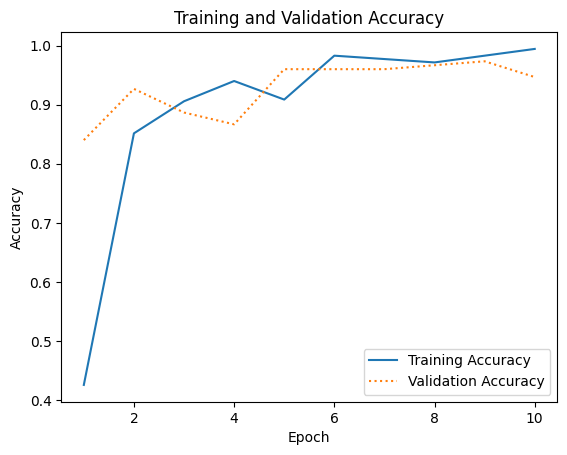

5/5 [==============================] - 5s 1s/step
Epoch 1/10
35/35 [==============================] - 47s 1s/step - loss: 23.3273 - accuracy: 0.7714 - val_loss: 9.9145 - val_accuracy: 0.8867
Epoch 2/10
35/35 [==============================] - 45s 1s/step - loss: 2.3896 - accuracy: 0.9571 - val_loss: 2.5962 - val_accuracy: 0.9600
Epoch 3/10
35/35 [==============================] - 44s 1s/step - loss: 0.7354 - accuracy: 0.9857 - val_loss: 2.4050 - val_accuracy: 0.9733
Epoch 4/10
35/35 [==============================] - 57s 2s/step - loss: 0.7893 - accuracy: 0.9886 - val_loss: 2.3120 - val_accuracy: 0.9667
Epoch 5/10
35/35 [==============================] - 44s 1s/step - loss: 0.0989 - accuracy: 0.9971 - val_loss: 3.9424 - val_accuracy: 0.9600
Epoch 6/10
35/35 [==============================] - 46s 1s/step - loss: 0.7004 - accuracy: 0.9886 - val_loss: 6.0777 - val_accuracy: 0.9467
Epoch 7/10
35/35 [==============================] - 46s 1s/step - loss: 0.9014 - accuracy: 0.9857 - val_loss:

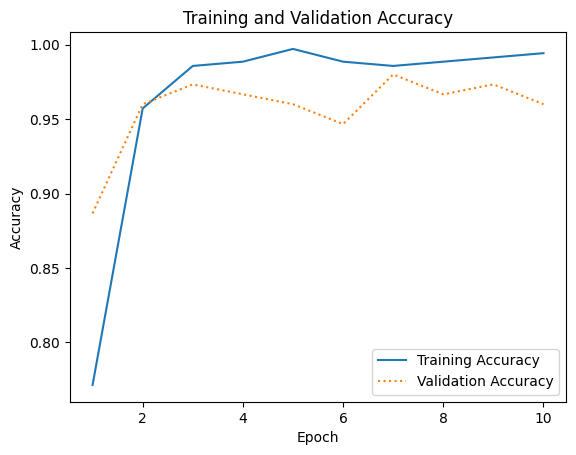

5/5 [==============================] - 1s 111ms/step


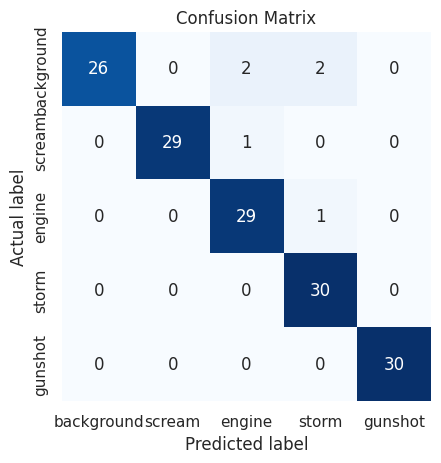

              precision    recall  f1-score   support

  background       1.00      0.87      0.93        30
      scream       1.00      0.97      0.98        30
      engine       0.91      0.97      0.94        30
       storm       0.91      1.00      0.95        30
     gunshot       1.00      1.00      1.00        30

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [ ]:
import numpy as np
import librosa.display, os
import matplotlib.pyplot as plt
%matplotlib inline

def create_spectrogram(y, sr, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    # Compute the mel spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr)

    # Convert to decibels (log scale)
    S_dB = librosa.power_to_db(S, ref=np.max)

    # Display the spectrogram
    librosa.display.specshow(S_dB, sr=sr)

    # Save the spectrogram as an image
    fig.savefig(image_file)
    plt.close(fig)

def create_pngs_from_wavs(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    # Loop through all audio files in the input path
    for file in os.listdir(input_path):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.wav', '.png'))

        # Load the audio file
        y, sr = librosa.load(input_file, sr=None)

        # Create and save the spectrogram
        create_spectrogram(y, sr, output_file)

# Function to load images and labels from a path
from keras.preprocessing import image

def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        labels.append(label)

    return images, labels

# Function to show images
def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)

# Load images from spectrogram folders
x = []
y = []

images, labels = load_images_from_path('/drive/MyDrive/Colab Notebooks/Spectrograms/background', 0)
x += images
y += labels

images, labels = load_images_from_path('/drive/MyDrive/Colab Notebooks/Spectrograms/scream', 1)
x += images
y += labels

images, labels = load_images_from_path('/drive/MyDrive/Colab Notebooks/Spectrograms/engine', 2)
x += images
y += labels

images, labels = load_images_from_path('/drive/MyDrive/Colab Notebooks/Spectrograms/storm', 3)
x += images
y += labels

images, labels = load_images_from_path('/drive/MyDrive/Colab Notebooks/Spectrograms/gunshot', 4)
x += images
y += labels

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=0)

x_train_norm = np.array(x_train) / 255
x_test_norm = np.array(x_test) / 255

y_train_encoded = to_categorical(y_train, num_classes=5)
y_test_encoded = to_categorical(y_test, num_classes=5)

# CNN model for spectrogram images
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

hist = model.fit(x_train_norm, y_train_encoded, validation_data=(x_test_norm, y_test_encoded), batch_size=10, epochs=10)
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# MobileNetV2 model for feature extraction
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet import preprocess_input

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x_train_norm = preprocess_input(np.array(x_train))
x_test_norm = preprocess_input(np.array(x_test))

train_features = base_model.predict(x_train_norm)
test_features = base_model.predict(x_test_norm)

# New model on top of MobileNetV2 features
model = Sequential()
model.add(Flatten(input_shape=train_features.shape[1:]))
model.add(Dense(1024, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

hist = model.fit(train_features, y_train_encoded, validation_data=(test_features, y_test_encoded), batch_size=10, epochs=10)
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()

y_predicted = model.predict(test_features)
mat = confusion_matrix(y_test_encoded.argmax(axis=1), y_predicted.argmax(axis=1))
class_labels = ['background', 'scream', 'engine', 'storm', 'gunshot']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
from sklearn.metrics import classification_report

y_pred = np.argmax(y_predicted, axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

print(classification_report(y_true, y_pred, target_names=class_labels))




In [ ]:
import tensorflow as tf

# Assuming `model` is your trained Keras model
model.save('cnn_model_02.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
